<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Autor: Mario Ubierna San Mamés

# PEC 1 - Soluciones tabulares

En esta práctica implementaremos los diferentes métodos de aprendizaje por refuerzo vistos en las Partes I y II del curso. En concreto, nos centraremos en la definición de un entorno e implementaremos los diferentes métodos para buscar una solución óptima del problema.

**<u>Importante</u>**: 

1. Esta PEC debe realizarse de **forma estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.

2. Es necesario que el estudiante indique **todas las fuentes que ha utilizado para la realización de la PEC**. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

3. La entrega debe hacerse en **formato notebook y en formato html** donde se vea el código, los resultados y comentarios de cada ejercicio. Es decir, deben entregarse dos ficheros: uno con extensión .ipynb y otro .html. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.


## 0. El entorno __CliffWalking__

El entorno __CliffWalking__ consiste en un agente que se mueve en una cuadrícula de dimensiones 12x4 (ancho x alto). En cada paso, el agente tiene 4 opciones de acción o movimiento: ARRIBA, DERECHA, ABAJO, IZQUIERDA. La posición de cada casilla viene dada por una pareja de números naturales [x, y], donde la posición de la esquina de arriba a la izquierda sería el origen de coordenadas [0, 0]. El agente siempre sale de la misma casilla [0, 3] (esquina abajo izquierda) y el juego termina cuando el agente llega a la casilla de llegada [11, 3] (esquina abajo derecha).

El entorno se corresponde con el ejemplo 'Cuadrícula con precipicio' explicado en la sección 3.2.1. del módulo "Métodos de Diferencia Temporal". El problema radica en que en todas las casillas la recompensa inmediata es R=-1 excepto en las casillas que unen en línea recta la casilla de salida con la de llegada, casillas  [1, 3] a  [10, 3]. En estas casillas, que simulan un precipicio, la recompensa es R=-100 y se vuelve a la casilla inicial.

<img src="CliffWalking.png">
Fuente: Sutton & Barto, 2018

El código para implementar este entorno, que se encuentra disponible en el fichero adjunto `cliff_env.py`, ha sido adaptado del siguiente enlace:
https://pypi.org/project/gym-gridworlds/

Vamos a empezar cargando el entorno y ver qué características tiene, ejecutando un episodio de prueba.

### 0.1. Carga de datos
El siguiente código carga los paquetes necesarios para ejecutar el ejemplo, crea el entorno mediante la instanciación de un objeto de la clase `CliffEnv` (importada del archivo adjunto `cliff_env.py`) e imprime por pantalla la dimensión del espacio de acciones (0=arriba, 1=derecha, 2=abajo y 3=izquierda), el espacio de observaciones (una tupla que indica la posición del agente en la cuadrícula) y el rango de la variable de recompensa (cuyo valor es -1 o -100 dependiendo de la casilla visitada y que por tanto va de menos infinito a más infinito).

In [1]:
!pip install gym

In [2]:
import gym
import numpy as np
import cliff_env as cenv
from collections import defaultdict
import random
import matplotlib.pyplot as plt

env=cenv.CliffEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(12), Discrete(4)) 
Reward range is (-inf, inf) 


### 0.2. Ejecución de un episodio

A continuación, realizaremos la ejecución de un episodio del entorno CliffWalking utilizando un agente que selecciona las acciones de forma aleatoria.


In [3]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L",
    }

while not done:
    
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()
    
    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
    
    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Obs inicial: (0, 3) 
Action: R -> Obs: (0, 3) and reward: -100
Action: D -> Obs: (0, 3) and reward: -1
Action: D -> Obs: (0, 3) and reward: -1
Action: D -> Obs: (0, 3) and reward: -1
Action: L -> Obs: (0, 3) and reward: -1
Action: U -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: U -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: R -> Obs: (1, 2) and reward: -1
Action: R -> Obs: (2, 2) and reward: -1
Action: L -> Obs: (1, 2) and reward: -1
Action: U -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: U -> Obs: (2, 0) and reward: -1
Action: L -> Obs: (1, 0) and reward: -1
Action: D -> Obs: (1, 1) and reward: -1
Action: L -> Obs: (0, 1) and reward: -1
Action: R -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: L -> Obs: (1, 1) and reward: -1
Action: U -> Obs: (1, 0) and reward: -1
Action: U -> Obs: (1, 0) and reward: -1
Action: U -> Obs: (1, 0) and reward: -1
Action: D -> Obs:

## 1. Modificación del entorno (1,5 puntos)
El entorno CliffWalking tiene varios parámetros que pueden ser modificados:


*   La dimensión de la cuadrícula.
*   La posición del precipicio.
*   La posición de las casillas de salida y de llegada.
*   La recompensa inmediata.

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.1</strong> (0,75 puntos)</div>

Modificar el codigo de CliffWalking (fichero adjunto `cliff_env.py`) para que represente las propiedades de la cuadrícula descritas a continuación.

- Cuadrícula 5x11
- Posición del precipicio = Casillas [1,0], [2,0], [3,0], [4,0], [5,0], [6,0], [7,0], [8,0] y [9,0]
- Casilla de inicio [0,0]
- Casilla final [10,0]
- Recompensa en casillas normales = -1
- Recompensa en casillas del precipicio = -500 (y volvemos a la casilla de salida)

Guardar el entorno modificado en el archivo `cliff_env_v2.py`, en la misma carpeta que el original. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html).

In [4]:
import gym
import numpy as np
import cliff_env_v2 as ce2

env=ce2.CliffEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(11), Discrete(5)) 
Reward range is (-inf, inf) 


<div style="background-color: ; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.2</strong> (0,25 puntos)</div>

A continuación, implementar un agente que lleve a cabo una política aleatoria. Comprobar que las casillas visitadas y las recompensas recibidas se corresponden con las acciones y el entorno programado.

Mostrar la trayectoria seguida por el agente. No es necesario graficarla, tan sólo mostrar las coordenadas de las casillas visitadas en orden y las recompensas recibidas.

In [5]:
# Environment reset
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }

Obs inicial: (0, 0) 


In [6]:
# Escribir el código aquí
while not done:
    # Obtenemos la acción y la ejecutamos
    action = env.action_space.sample()
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
    
    t += 1
    total_reward += reward
    obs = new_obs
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Action: L -> Obs: (0, 0) and reward: -1
Action: L -> Obs: (0, 0) and reward: -1
Action: R -> Obs: (0, 0) and reward: -500
Action: U -> Obs: (0, 0) and reward: -1
Action: R -> Obs: (0, 0) and reward: -500
Action: D -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: D -> Obs: (0, 3) and reward: -1
Action: U -> Obs: (0, 2) and reward: -1
Action: U -> Obs: (0, 1) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: L -> Obs: (0, 0) and reward: -1
Action: D -> Obs: (0, 1) and reward: -1
Action: L -> Obs: (0, 1) and reward: -1
Action: L -> Obs: (0, 1) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: L -> Obs: (0, 0) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: R -> Obs: (0, 0) and reward: -500
Action: R -> Obs: (0, 0) and reward: -500
Action: D -> Obs: (0, 1) and rew

Action: D -> Obs: (6, 2) and reward: -1
Action: D -> Obs: (6, 3) and reward: -1
Action: R -> Obs: (7, 3) and reward: -1
Action: L -> Obs: (6, 3) and reward: -1
Action: L -> Obs: (5, 3) and reward: -1
Action: R -> Obs: (6, 3) and reward: -1
Action: L -> Obs: (5, 3) and reward: -1
Action: D -> Obs: (5, 4) and reward: -1
Action: D -> Obs: (5, 4) and reward: -1
Action: D -> Obs: (5, 4) and reward: -1
Action: R -> Obs: (6, 4) and reward: -1
Action: L -> Obs: (5, 4) and reward: -1
Action: L -> Obs: (4, 4) and reward: -1
Action: U -> Obs: (4, 3) and reward: -1
Action: R -> Obs: (5, 3) and reward: -1
Action: D -> Obs: (5, 4) and reward: -1
Action: R -> Obs: (6, 4) and reward: -1
Action: D -> Obs: (6, 4) and reward: -1
Action: D -> Obs: (6, 4) and reward: -1
Action: D -> Obs: (6, 4) and reward: -1
Action: U -> Obs: (6, 3) and reward: -1
Action: U -> Obs: (6, 2) and reward: -1
Action: D -> Obs: (6, 3) and reward: -1
Action: D -> Obs: (6, 4) and reward: -1
Action: U -> Obs: (6, 3) and reward: -1


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.3</strong> (0,5 puntos)</div>

A continuación, implementar un agente que lleve a cabo la política óptima determinista, es decir, que partiendo de la casilla inicial [0,0] llegue a la casilla final [10,0] en el menor número de pasos posible. ¿Cuál es el valor del número de pasos mínimos?

Mostrar la trayectoria seguida por el agente y el retorno obtenido. No es necesario graficarla, tan sólo mostrar las coordenadas de las casillas visitadas en orden.

In [7]:
# Environment reset
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }

Obs inicial: (0, 0) 


In [8]:
# Escribir el código aquí

# Camino óptimo
# ["D", "R", "R", "R", "R", "R", "R", "R", "R", "R", "R", "U"]
path = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

for action in path:
    new_obs, reward, done, info = env.step(action)
    
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
    
    t += 1
    total_reward += reward
    obs = new_obs
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Action: D -> Obs: (0, 1) and reward: -1
Action: R -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: R -> Obs: (3, 1) and reward: -1
Action: R -> Obs: (4, 1) and reward: -1
Action: R -> Obs: (5, 1) and reward: -1
Action: R -> Obs: (6, 1) and reward: -1
Action: R -> Obs: (7, 1) and reward: -1
Action: R -> Obs: (8, 1) and reward: -1
Action: R -> Obs: (9, 1) and reward: -1
Action: R -> Obs: (10, 1) and reward: -1
Action: U -> Obs: (10, 0) and reward: -1
Episode finished after 12 timesteps and reward was -12 


<div style="background-color: grey; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
El número de pasos mínimos son 12, y viene determinado por la "U" que hay que hacer desde la casilla de salida [0,0] hasta la casilla final [10,0], bordeando el precipicio, es decir, tenemos que tomar de salida la acción hacia abajo, luego seleccionar 10 veces la acción hacia la derecha, y finalmente la acción hacia arriba.
    
También cabe destacar que, lógicamente cuando tenemos una política óptima llegamos al resultado en menos pasos que si la política es aleatoria, es por ello que en este segundo ejercicio obtenemos una mejor recompensa en el menor número de pasos.
</div>


## 2. Programación Dinámica (2.5 puntos)

Dado que el entorno es determinista, es factible encontrar una política óptima (que en este caso es única) que consiga el mayor retorno (y por tanto la trayectoria más corta).

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Programación Dinámica, en concreto estudiaremos el algoritmo *Iteración del valor*. 

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.1</strong> (1 puntos)</div>

Implementar el Algoritmo 3 explicado en el módulo "Programación Dinámica" utilizando los siguientes parámetros:
    
- Theta = 0.001
- Factor de descuento (*discount factor*) = 1

In [9]:
# Escribir el código aquí
def valueIteration_DP(env, theta = 0.001, gamma = 1):
    # DEFINICIÓN VARIABLES
    # Índices cruzados porque el problema original lo que en programación es [0,10] lo representa como [10,0]
    estados = [(j,i) for i in range(env.height) for j in range(env.width)]
    P = {e:random.randint(0,3) for e in estados} # Diccionario Política (estado) => accion
    V = {e:0 for e in estados} # Diccionario funciones de valor (estado) => función valor
    incremento = 1
    rewards = []

    while incremento > theta:
        incremento = 0
        reward_iter = 0

        for s in estados:
            rewards_s = []  # Inicializamos las recompensas
            v_anterior = V[s]
            if s != (env.width - 1, 0): # Si no es el estado terminal (10,0)
                v_acciones = []

                for a in env.moves: # Por cada una de las acciones nos quedamos con el máximo de todas ellas
                    env.set_state(s)
                    next_s, reward, done, info = env.step(a)
                    v_s = reward + (gamma * V[next_s])
                    v_acciones.append(v_s)
                    rewards_s.append(reward)

                V[s] = max(v_acciones)
                P[s] = np.argmax(v_acciones)
                reward_iter += rewards_s[np.argmax(v_acciones)]
                incremento = max(incremento, np.abs(v_anterior - V[s]))
                
        rewards.append(reward_iter)
        
    return V, P, rewards

In [88]:
V, P, rewards = valueIteration_DP(env, 0.001, 1)

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.2</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla los valores finales de la función de valor para cada celda. 

Se muestra a continuación una imagen de ejemplo para la cuadrícula del entorno modificado de 11x5.

<img src="ValueFunction.png">

In [10]:
# función que muestra los valores de la función de estado V(s) en la cuadricula
def rellenarEspacios(string, length):
    s = string
    tam = len(string)
    while tam < length:
        s += " "
        tam += 1
    return s

def print_values(V, width, height):
    # Escribir el código aquí
    print("-------------------------------------------------------------------")
    row = ""
    i = 0
    for s in V:
        row += rellenarEspacios(str(V[s]), 3)
        row += " | "
        if i == width - 1:
            print("| " + row)
            print("-------------------------------------------------------------------")
            row = ""
            i = 0
        else:
            i += 1

In [90]:
print("values:")
print_values(V, 11, 5)

values:
-------------------------------------------------------------------
| -12 | -11 | -10 | -9  | -8  | -7  | -6  | -5  | -4  | -1  | 0   | 
-------------------------------------------------------------------
| -11 | -10 | -9  | -8  | -7  | -6  | -5  | -4  | -3  | -2  | -1  | 
-------------------------------------------------------------------
| -12 | -11 | -10 | -9  | -8  | -7  | -6  | -5  | -4  | -3  | -2  | 
-------------------------------------------------------------------
| -13 | -12 | -11 | -10 | -9  | -8  | -7  | -6  | -5  | -4  | -3  | 
-------------------------------------------------------------------
| -14 | -13 | -12 | -11 | -10 | -9  | -8  | -7  | -6  | -5  | -4  | 
-------------------------------------------------------------------


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.3</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

Se muestra a continuación una imagen de ejemplo para la cuadrícula del entorno modificado de 11x5.

<img src="Policy.png">

In [11]:
# Función que dada la clave de la acción devuelve el nombre del movimiento
def transletionActionMove(action):
    move = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    return move[action]

In [12]:
def print_policy_DP(policy, width, height):
    # Escribir el código aquí
    print("---------------------------------------------")
    row = ""
    i = 0
    for s in policy:
        pos_accion = policy[s]
        accion = transletionActionMove(pos_accion)
        row += rellenarEspacios(accion, 1)
        row += " | "
        if i == width - 1:
            print("| " + row)
            print("---------------------------------------------")
            row = ""
            i = 0
        else:
            i += 1 

In [93]:
print("policy:")
print_policy_DP(P,11,5)

policy:
---------------------------------------------
| D | D | D | D | D | D | D | D | D | R | U | 
---------------------------------------------
| R | R | R | R | R | R | R | R | R | R | U | 
---------------------------------------------
| U | U | U | U | U | U | U | U | U | U | U | 
---------------------------------------------
| U | U | U | U | U | U | U | U | U | U | U | 
---------------------------------------------
| U | U | U | U | U | U | U | U | U | U | U | 
---------------------------------------------


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.4</strong> (0.5 puntos)</div>

Ejecutar un episodio con la política óptima encontrada y mostrar la trayectoria del agente y el retorno obtenido.

In [13]:
def execute_episode_DP(policy,env):
    # Escribir el código aquí
    obs = env.reset()
    t, total_reward, done = 0, 0, False

    print("Obs inicial: {} ".format(obs))
    
    while not done:
        # Obtenemos la acción y la ejecutamos
        action = policy[obs]
        new_obs, reward, done, info = env.step(action)

        # Imprimir time-step
        print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))

        t += 1
        total_reward += reward
        obs = new_obs
    
    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    env.close()

In [95]:
execute_episode_DP(P,env)

Obs inicial: (0, 0) 
Action: D -> Obs: (0, 1) and reward: -1
Action: R -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: R -> Obs: (3, 1) and reward: -1
Action: R -> Obs: (4, 1) and reward: -1
Action: R -> Obs: (5, 1) and reward: -1
Action: R -> Obs: (6, 1) and reward: -1
Action: R -> Obs: (7, 1) and reward: -1
Action: R -> Obs: (8, 1) and reward: -1
Action: R -> Obs: (9, 1) and reward: -1
Action: R -> Obs: (10, 1) and reward: -1
Action: U -> Obs: (10, 0) and reward: -1
Episode finished after 12 timesteps and reward was -12 


## 3. Métodos de Montecarlo (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Montecarlo, en concreto estudiaremos el algoritmo *On-policy every-visit MC control (para políticas $\epsilon$-soft)*. 

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.1</strong> (1 punto)</div>

A partir del Algoritmo 3 explicado en el módulo "Métodos de Montecarlo", modificarlo para implementar el algoritmo *On-policy every-visit MC control (para políticas $\epsilon$-soft)* utilizando los siguientes parámetros:
    
- Número de episodios = 100000
- Epsilon inicial = 1
- Factor de decaimiento de epsilon (*epsilon decay*) = 0.999
- Actualizar epsilon según: $$\textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, 0.01)$$
- Factor de descuento = 1

In [14]:
# Escribir el código aquí
# https://github.com/dennybritz/reinforcement-learning/blob/master/MC/README.md
# https://www.analyticsvidhya.com/blog/2018/11/reinforcement-learning-introduction-monte-carlo-learning-openai-gym/

# Método que nos devuelve una política arbitraria, todas las acciónes tienen la misma probabilidad
# p = 1 / número de acciones = 1/4
def getRandomPolicy(env):
    estados = [(j,i) for i in range(env.height) for j in range(env.width)]
    P = {e:np.ones(env.action_space.n) * (1 / env.action_space.n) for e in estados}
    P[(env.width - 1, 0)] = np.zeros(env.action_space.n)
    return P

# Método que nos devuelve una Q(s,a) inicial arbitraria, tiene valores aleatorios para todos los estadaos
# menos para el estado terminal, en él tenemos todo ceros
def getInitialQ(env):
    estados = [(j,i) for i in range(env.height) for j in range(env.width)]
    Q = {e:np.random.rand(env.action_space.n) for e in estados}
    Q[(env.width - 1, 0)] = np.zeros(env.action_space.n) # Estado terminal con 0
    return Q

# Método que devuelve para cada estado la mejor acción
def best_policy(Q):
    return dict((k,np.argmax(v)) for k, v in Q.items())

# Método que se encarga de devolvernos la ejecución de un episodio según una política
# Devuelve una lista del tipo [[S0, A0, R1]]
def getEpisode(env, P):
    estado = env.reset()
    episodio = []
    done = False
    
    while not done:
        paso = []
        # Añadimos el estado
        paso.append(estado) 
        
        # Añadimos la acción
        pro = 0
        umbral = random.uniform(0, sum(P[estado]))
        for i in range(len(P[estado])):
            pro += P[estado][i]
            if umbral < pro:
                accion = i
                paso.append(i)
                break
                
        # Añadimos la recompensa
        estado_next, reward, done, info = env.step(accion)
        paso.append(reward)
        
        episodio.append(paso)
        estado = estado_next
        
    return episodio

In [15]:
# Escribir el código aquí
def onPolicyEveryVisit_MCControl(env, num_episodios = 100000, epsilon = 1, epsilon_decay = 0.999, gamma = 1):
    P = getRandomPolicy(env) # Matriz política arbitraría
    Q = getInitialQ(env) # Matriz Q arbitraria
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    rewards = []
    
    for i in range(num_episodios):
        G = 0
        episodio = getEpisode(env, P)
        
        reward_episodio = 0
        
        if i%10000 == 0:
            print("Episodio: " + str(i))
        
        for paso in reversed(episodio):
            estado, accion, reward = paso
            estado_accion = (estado, accion) # Se usa para el diccionario de returns
            G = (gamma * G) + reward
            
            reward_episodio += reward
            
            returns_sum[estado_accion] += G
            returns_count[estado_accion] += 1
                
            # Promedio
            Q[estado][accion] = returns_sum[estado_accion] / returns_count[estado_accion]
            
            # Obtener A*
            q_valores = Q[estado]
            q_max = np.max(q_valores)
            indices = []
            for i in range(len(q_valores)):
                if q_valores[i] == q_max:
                    indices.append(i)
            A_estrella = random.choice(indices)
            
            # Actualizar la política
            for a in range(len(P[estado])):
                if a == A_estrella:
                    P[estado][accion] = 1 - epsilon + (epsilon / env.action_space.n)
                else:
                    P[estado][accion] = (epsilon / env.action_space.n)
        epsilon = max(epsilon * epsilon_decay, 0.01)
        rewards.append(reward_episodio)
    
    P = best_policy(Q)
    return Q, P, rewards

In [100]:
Q, P, rewards = onPolicyEveryVisit_MCControl(env)

Episodio: 0
Episodio: 10000
Episodio: 20000
Episodio: 30000
Episodio: 40000
Episodio: 50000
Episodio: 60000
Episodio: 70000
Episodio: 80000
Episodio: 90000


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.2</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

In [16]:
def print_policy_MC(policy, width, height):
    # Escribir el código aquí
    print("---------------------------------------------")
    row = ""
    i = 0
    for s in policy:
        pos_accion = policy[s]
        accion = transletionActionMove(pos_accion)
        row += rellenarEspacios(accion, 1)
        row += " | "
        if i == width - 1:
            print("| " + row)
            print("---------------------------------------------")
            row = ""
            i = 0
        else:
            i += 1

In [103]:
print_policy_MC(P,11,5)

---------------------------------------------
| D | L | R | U | R | R | L | R | D | L | U | 
---------------------------------------------
| D | D | D | D | D | D | D | R | R | R | U | 
---------------------------------------------
| D | D | D | R | R | R | R | R | R | R | U | 
---------------------------------------------
| D | R | R | R | R | R | R | R | R | R | U | 
---------------------------------------------
| R | R | R | R | R | R | R | R | R | R | U | 
---------------------------------------------


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.3</strong> (0.5 puntos)</div>

Ejecutar un episodio con la política óptima encontrada y mostrar la trayectoria del agente y el retorno obtenido.

In [17]:
def execute_episode_MC(policy, env):
    # Escribir el código aquí
    obs = env.reset()
    t, total_reward, done = 0, 0, False

    print("Obs inicial: {} ".format(obs))

    while not done:
        # Obtenemos la acción y la ejecutamos
        action = policy[obs]
        new_obs, reward, done, info = env.step(action)

        # Imprimir time-step
        print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))

        t += 1
        total_reward += reward
        obs = new_obs

    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    env.close()

In [105]:
execute_episode_MC(P,env)

Obs inicial: (0, 0) 
Action: D -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: D -> Obs: (0, 3) and reward: -1
Action: D -> Obs: (0, 4) and reward: -1
Action: R -> Obs: (1, 4) and reward: -1
Action: R -> Obs: (2, 4) and reward: -1
Action: R -> Obs: (3, 4) and reward: -1
Action: R -> Obs: (4, 4) and reward: -1
Action: R -> Obs: (5, 4) and reward: -1
Action: R -> Obs: (6, 4) and reward: -1
Action: R -> Obs: (7, 4) and reward: -1
Action: R -> Obs: (8, 4) and reward: -1
Action: R -> Obs: (9, 4) and reward: -1
Action: R -> Obs: (10, 4) and reward: -1
Action: U -> Obs: (10, 3) and reward: -1
Action: U -> Obs: (10, 2) and reward: -1
Action: U -> Obs: (10, 1) and reward: -1
Action: U -> Obs: (10, 0) and reward: -1
Episode finished after 18 timesteps and reward was -18 


## 4. Métodos de Diferencia Temporal (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Diferencia Temporal en el entorno CliffWalking modificado anteriormente. Concretamente nos centraremos en el método SARSA.

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1</strong> (1 punto)</div>

Implementar el algoritmo *SARSA* explicado en el modulo "Aprendizaje por Diferencia Temporal" utilizando los siguientes parámetros:
    
- Número de episodios = 1000
- *learning rate* = 0.5
- *discount factor* = 1
- *epsilon* = 0.05  

In [35]:
# Escribir el código aquí
# https://github.com/TissueC/QLearning-and-Sarsa-for-Cliff-Walking/blob/master/code/Sarsa.py

# Método que nos devuelve la acción según la probabilidad, siendo epsilon la probabilidad de
# seleccionar aleatoriamente la acción, y 1 - epsilon seleccionar la mejor opción
def greedy_policy(env, Q, estado, epsilon):
    action = np.argmax(Q[estado])
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    return action

# Algortimo SARSA
def sarsa_TD(env, num_episodios = 1000, alpha = 0.5, gamma = 1, epsilon = 0.05):
    # INICIALIZACIÓN variables
    estados = [(j,i) for i in range(env.height) for j in range(env.width)]
    Q = {e:np.random.rand(env.action_space.n) for e in estados}
    Q[(env.width - 1, 0)] = np.zeros(env.action_space.n)
    rewards = []
    
    for episodio in range(num_episodios):
        done = False
        estado = env.reset() # Inicializamos el estado para cada episodio
        accion = greedy_policy(env, Q, estado, epsilon) # Obtenemos la acción con E-greedy
        reward_episodio = 0
        
        while not done: # Mientras no hayamos llegado a la celda final
            estado_next, reward, done, info = env.step(accion)
            accion_next = greedy_policy(env, Q, estado_next, epsilon)
            
            Q[estado][accion] = Q[estado][accion] + alpha * (reward + gamma * Q[estado_next][accion_next] - Q[estado][accion])
            
            estado = estado_next
            accion = accion_next
            
            reward_episodio += reward
        
        rewards.append(reward_episodio)    
    return Q, rewards

In [36]:
Q, rewards = sarsa_TD(env)

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2</strong> (0.25 puntos)</div>

Mostrar por pantalla los valores Q estimados para cada par estado-acción.

In [37]:
#Escribir el código aquí
row = ""
print("----------------------------------------------------------------")
row += rellenarEspacios("| Estado", 10) + " | "
row += rellenarEspacios("Up", 10) + " | "
row += rellenarEspacios("Right", 10) + " | "
row += rellenarEspacios("Down", 10) + " | "
row += rellenarEspacios("Left", 10) + " | "
print(row)
print("----------------------------------------------------------------")

for clave in Q:
    row = rellenarEspacios("| " + str(clave), 10) + " | "
    row += rellenarEspacios(str(round(Q[clave][0], 3)), 10) + " | "
    row += rellenarEspacios(str(round(Q[clave][1], 3)), 10) + " | "
    row += rellenarEspacios(str(round(Q[clave][2], 3)), 10) + " | "
    row += rellenarEspacios(str(round(Q[clave][3], 3)), 10) + " | "
    print(row)
    print("----------------------------------------------------------------")

----------------------------------------------------------------
| Estado   | Up         | Right      | Down       | Left       | 
----------------------------------------------------------------
| (0, 0)   | -34.709    | -528.165   | -24.102    | -90.052    | 
----------------------------------------------------------------
| (1, 0)   | 0.232      | 0.562      | 0.008      | 0.114      | 
----------------------------------------------------------------
| (2, 0)   | 0.941      | 0.051      | 0.323      | 0.137      | 
----------------------------------------------------------------
| (3, 0)   | 0.797      | 0.209      | 0.719      | 0.381      | 
----------------------------------------------------------------
| (4, 0)   | 0.574      | 0.81       | 0.164      | 0.584      | 
----------------------------------------------------------------
| (5, 0)   | 0.921      | 0.972      | 0.006      | 0.189      | 
----------------------------------------------------------------
| (6, 0)   | 0.049

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.3</strong> (0.25 puntos)</div>

Mostrar por pantalla los valores de la función de valor $v_\pi(s)$ estimada para cada estado.

In [38]:
# función que muestra los valores de la función de estado V(s) en la cuadricula
def print_values_SARSA(Q, width, height):
    #Escribir el código aquí
    print("--------------------------------------------------------------------------------------------------------------")
    row = ""
    i = 0
    for s in Q:
        v_s = max(Q[s])
        row += rellenarEspacios(str(round(v_s, 3)), 7)
        row += " | "
        if i == width - 1:
            print("|" + row)
            print("--------------------------------------------------------------------------------------------------------------")
            row = ""
            i = 0
        else:
            i += 1



In [39]:
print_values_SARSA(Q, 11, 5)

--------------------------------------------------------------------------------------------------------------
|-24.102 | 0.562   | 0.941   | 0.797   | 0.81    | 0.972   | 0.932   | 0.722   | 0.61    | 0.586   | 0.0     | 
--------------------------------------------------------------------------------------------------------------
|-17.662 | -18.573 | -15.957 | -15.405 | -13.083 | -12.864 | -5.073  | -4.416  | -3.736  | -2.005  | -1.0    | 
--------------------------------------------------------------------------------------------------------------
|-16.501 | -17.866 | -14.916 | -15.417 | -13.463 | -12.258 | -10.368 | -9.511  | -5.356  | -5.309  | -2.003  | 
--------------------------------------------------------------------------------------------------------------
|-15.497 | -14.551 | -14.116 | -13.346 | -11.654 | -10.314 | -9.49   | -8.212  | -7.258  | -4.106  | -3.027  | 
------------------------------------------------------------------------------------------------------------

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.4</strong> (0.25 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

In [40]:
def print_policy_SARSA(Q, width, height):
    # Escribir el código aquí
    print("---------------------------------------------")
    row = ""
    i = 0
    for s in Q:
        pos_accion = np.argmax(Q[s])
        accion = transletionActionMove(pos_accion)
        row += rellenarEspacios(accion, 1)
        row += " | "
        if i == width - 1:
            print("| " + row)
            print("---------------------------------------------")
            row = ""
            i = 0
        else:
            i += 1
    

In [41]:
print_policy_SARSA(Q,11,5)

---------------------------------------------
| D | R | U | U | R | R | L | L | R | U | U | 
---------------------------------------------
| D | D | D | D | D | D | R | R | R | R | U | 
---------------------------------------------
| D | L | D | D | R | D | D | L | D | D | U | 
---------------------------------------------
| R | D | D | D | R | D | R | D | D | R | U | 
---------------------------------------------
| R | R | R | R | R | R | R | R | R | U | U | 
---------------------------------------------


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.5</strong> (0.25 puntos)</div>

Ejecutar un episodio siguiendo la política óptima encontrada, donde se pueda reconocer la trayectoria seguida por el agente.

In [42]:
# ejecución de un episodio siguiendo la politica optima
def execute_episode_SARSA(Q, env):
    #Escribir el código aquí
    obs = env.reset()
    t, total_reward, done = 0, 0, False

    print("Obs inicial: {} ".format(obs))

    while not done:
        # Obtenemos la acción y la ejecutamos
        action = np.argmax(Q[obs])
        new_obs, reward, done, info = env.step(action)

        # Imprimir time-step
        print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))

        t += 1
        total_reward += reward
        obs = new_obs

    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    env.close()

In [43]:
execute_episode_SARSA(Q, env)

Obs inicial: (0, 0) 
Action: D -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: D -> Obs: (0, 3) and reward: -1
Action: R -> Obs: (1, 3) and reward: -1
Action: D -> Obs: (1, 4) and reward: -1
Action: R -> Obs: (2, 4) and reward: -1
Action: R -> Obs: (3, 4) and reward: -1
Action: R -> Obs: (4, 4) and reward: -1
Action: R -> Obs: (5, 4) and reward: -1
Action: R -> Obs: (6, 4) and reward: -1
Action: R -> Obs: (7, 4) and reward: -1
Action: R -> Obs: (8, 4) and reward: -1
Action: R -> Obs: (9, 4) and reward: -1
Action: U -> Obs: (9, 3) and reward: -1
Action: R -> Obs: (10, 3) and reward: -1
Action: U -> Obs: (10, 2) and reward: -1
Action: U -> Obs: (10, 1) and reward: -1
Action: U -> Obs: (10, 0) and reward: -1
Episode finished after 18 timesteps and reward was -18 


## 5. Comparativa de los algoritmos (2 puntos)

En este apartado haremos diferentes comparativas de las implementaciones de los metodos programados en los apartados anteriores.

Compararemos el comportamiento de los algoritmos al modificar los valores del factor de descuento, el *learning rate* y el numero de episodios.

Para cada ejercicio se debe mostrar y justificar el resultado.

<u>NOTA</u>: se recomienda realizar varias veces las simulaciones en cada ejercicio, ya que éstas son aleatorias, y comentar el resultado más frecuente, o una media de estos.

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.1 - Análisis de las políticas obtenidas</strong> (0,5 puntos)</div> 

Realizar un estudio de las políticas obtenidas respondiendo a las siguientes preguntas:
- ¿Todos los algoritmos consiguen llegar a la política óptima?
- ¿A qué pueden ser debidas las diferencias entre políticas? (Si las hay)

<div style="background-color: grey; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
Respondiendo a la primera pregunta, todos los algoritmos consiguen converger a una política válida, es decir, que nos permita salir de la casilla inicial hasta la final sin caernos al precipicio. Sin embargo, no todos los algoritmos consiguen llegar a la política óptima, solamente el primer algoritmo (Iteración del valor - Programación dinámica) consigue llegar a la política óptima.
    
En cuanto a la segunda pregunta, la principal diferencia entre los tres algoritmos es si se tiene un conocimiento del entorno, o se busca la política óptima a partir de la experiencia del agente. Es decir, los algoritmos de programación dinámica tienen en todo momento el conocimiento del modelo del entorno, es decir, saben cómo actúa el entorno, es por ello que son algoritmos que encuentran mejor una política óptima. Sin embargo, tanto los algoritmos de Montecarlo como de diferencia temporal basan el conocimiento del agente en la propia interacción del mismo con el entorno, es decir, al no tener ese conocimiento de base el agente tiene que ir generándolo, esto supone que no siempre se tomen las mejores decisiones y se creen políticas más conservadoras, es decir, que eviten acercarse al precipicio. Si analizamos tanto el algoritmo de montecarlo como el de diferencia temporal, vemos que prácticamente nos devuelve una política similar, es verdad, que el algoritmo de montecarlo suele ser un poco más pesimista que el algoritmo SARSA, esto no sucede siempre, es más la gran mayor parte del tiempo dan políticas iguales o muy similares, por lo que este cambio se lo podemos atribuir a si la política que usa es e-greedy o e-soft, ya que en montecarlo es e-soft y en diferencia temporal es e-greedy, esto lo que signficia es que si es e-greedy elegimos casi siempre la mejor acción, mientras que si es e-soft damos una mayor oportunidad a que la elección elegida no sea la mejor.
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.2 - Influencia del número de episodios</strong> (0,5 puntos)</div> 

Realizar un estudio cambiando el número de episodios en cada uno de los 3 algoritmos indicando:
- Cómo influye el número de episodios en cada algoritmo (a partir de qué número de episodios converge cada algoritmo)
- Comparativa de velocidad entre los 3 algoritmos. ¿Qué método es el más rápido en converger? ¿Cuál es el más lento? ¿A qué es debido?

In [1]:
# Estudio programación dinámica

# Caso base
V, P, rewards_base = valueIteration_DP(env, 0.001, 1)

# Menos iteraciones que el caso base
V, P, rewards_menos = valueIteration_DP(env, 0.1, 1)

# Más iteraciones que el caso base
V, P, rewards_mas = valueIteration_DP(env, 0.0001, 1)

print("Número de iteraciones caso base: " + str(len(rewards_base)))
print("Número de iteraciones caso menos: " + str(len(rewards_menos)))
print("Número de iteraciones caso más: " + str(len(rewards_mas)))

NameError: name 'valueIteration_DP' is not defined

Respecto al algoritmo de programación dinámica, no tiene sentido hablar de episodios, ya que éste no se basa en la interacción del agente con el entorno, es por ello que se va a realizar el estudio tanto para el algoritmo de montecarlo como el de diferencia temporal.

Como apunte, decir el algoritmo de programación dinámica consigue llegar a la política óptima en 15 iteraciones, es decir, es muy rápido independientemente del umbral que hayamos establecido.

In [50]:
def getSimplifiedData(episodios, datos, nDatosPorMil):
    simplifiedEpis = []
    simplifiedData = []
    
    if nDatosPorMil > 1000 or nDatosPorMil < 0:
        nDatosPorMil = 1000
        
    paso = round(1000 / nDatosPorMil)
    
    for i in range(len(episodios)):
        if i % paso == 0:
            simplifiedEpis.append(episodios[i])
            simplifiedData.append(datos[i])
            
    return simplifiedEpis, simplifiedData    

Episodio: 0


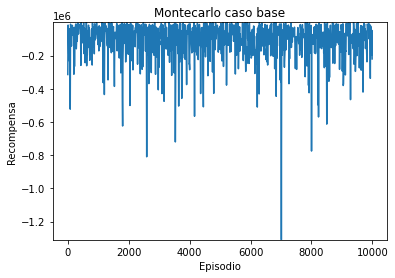

Episodio: 0


In [ ]:
# Estudio montecarlo

# Caso base
Q, P, rewards_base = onPolicyEveryVisit_MCControl(env, num_episodios=10000)
episodios = [i for i in range(1,10001)]
simplifiedEpis, simplifiedData = getSimplifiedData(episodios, rewards_base, 100)
fig, ax = plt.subplots()
ax.set_title("Montecarlo caso base")
ax.plot(simplifiedEpis, simplifiedData)
plt.ylim(min(simplifiedData), max(simplifiedData))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

# # Menos episodios que el caso base
Q, P, rewards_menos = onPolicyEveryVisit_MCControl(env, num_episodios=1000)
episodios = [i for i in range(1,1001)]
simplifiedEpis, simplifiedData = getSimplifiedData(episodios, rewards_menos, 1000)
fig, ax = plt.subplots()
ax.set_title("Montecarlo con menos episodios")
ax.plot(simplifiedEpis, simplifiedData)
plt.ylim(min(simplifiedData), max(simplifiedData))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

# # Más episodios que el caso base
Q, P, rewards_mas = onPolicyEveryVisit_MCControl(env, num_episodios=20000)
episodios = [i for i in range(1,20001)]
simplifiedEpis, simplifiedData = getSimplifiedData(episodios, rewards_mas, 50)
fig, ax = plt.subplots()
ax.set_title("Montecarlo con más episodios")
ax.plot(simplifiedEpis, simplifiedData)
plt.ylim(min(simplifiedData), max(simplifiedData))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

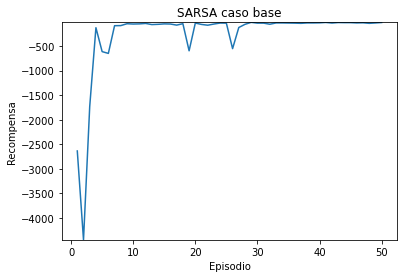

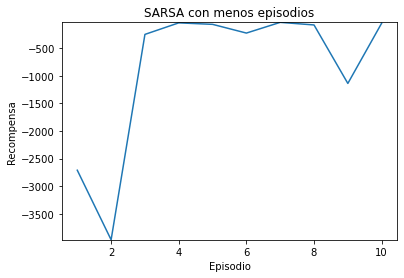

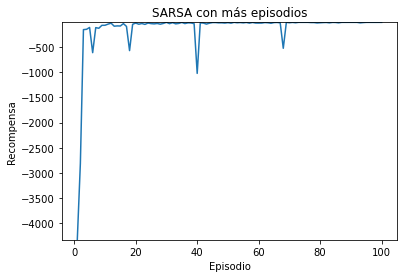

In [48]:
# Estudio SARSA

# Caso base
Q, rewards_base = sarsa_TD(env, num_episodios=50)
episodios = [i for i in range(1,51)]
fig, ax = plt.subplots()
ax.set_title("SARSA caso base")
ax.plot(episodios, rewards_base)
plt.ylim(min(rewards_base), max(rewards_base))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

# # Menos episodios que el caso base
Q, rewards_base = sarsa_TD(env, num_episodios=10)
episodios = [i for i in range(1,11)]
fig, ax = plt.subplots()
ax.set_title("SARSA con menos episodios")
ax.plot(episodios, rewards_base)
plt.ylim(min(rewards_base), max(rewards_base))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

# # Más episodios que el caso base
Q, rewards_base = sarsa_TD(env, num_episodios=100)
episodios = [i for i in range(1,101)]
fig, ax = plt.subplots()
ax.set_title("SARSA con más episodios")
ax.plot(episodios, rewards_base)
plt.ylim(min(rewards_base), max(rewards_base))
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
Conclusiones aquí
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.3 - Influencia del factor de descuento (discount factor)</strong> (0,5 puntos)</div> 

Ejecutar los 3 algoritmos con *discount factor*=0.1 y el resto de parámetros iguales que en los ejercicios 2, 3 y 4. Describir los cambios en la política óptima, comparando el resultado obtenido con el resultado de los ejercicios 2, 3 y 4 (*discount factor*=1).


In [ ]:
# Escribir el código de las simulaciones aquí


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
Conclusiones aquí
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.4 - Influencia del learning rate</strong> (0,5 puntos)</div> 

Ejecutar el algoritmo de *SARSA* con los siguientes valores de *learning rate*: 0.1 y 0.9. Analizar las diferencias con los resultados obtenidos en la pregunta 4 en términos de número de *time-steps* para llegar a la posición objetivo. Para ello, es necesario usar el mismo número de episodios. Finalmente, comparar el número de pasos por episodio (representar gráficamente el número de *time-steps* para cada episodio de la simulación en ambos casos) y verificar con que valor de *learning rate* el algoritmo converge más rápidamente.

In [ ]:
# Escribir el código de las simulaciones aquí


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
Conclusiones aquí
</div>